In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
genres_encoded = pd.read_csv("data/posters-and-genres.csv").drop(columns=['Id', 'Genre'])
genres = genres_encoded.columns.tolist()
genres_encoded.shape

(7254, 25)

In [3]:
genres_encoded = genres_encoded.values
genres_encoded

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]], dtype=int64)

In [4]:
genres_count = np.sum(genres_encoded, axis=0)
genres_count

array([1343,  870,  244,  441, 2900, 1176,  652, 3619,  434,  467,  224,
        503,  305,   97,  454,   10,   21,    2, 1334,  399,   46,  221,
        918,  144,   50], dtype=int64)

In [5]:
plt.style.use('ggplot')

In [6]:
data = {'Genre': genres, 'Count': genres_count}
df_genre_count = pd.DataFrame(data).set_index('Genre').sort_values('Count', ascending=False)

Text(0.5, 1.0, 'Distribution of Genres in Dataset')

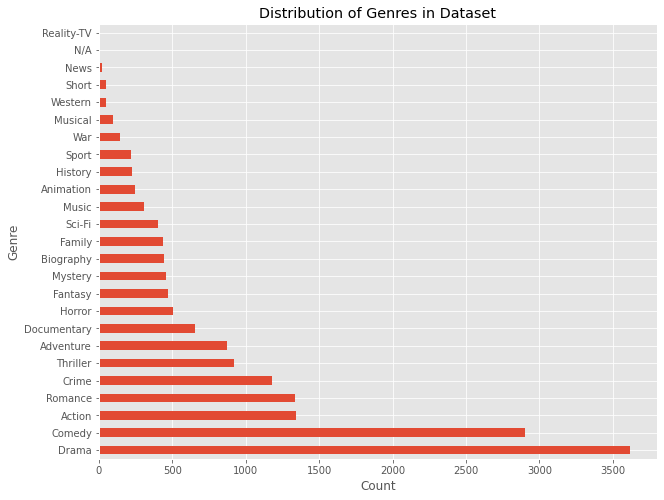

In [7]:
fig, ax = plt.subplots(figsize=(10, 8))
df_genre_count.plot(kind='barh', legend=False, ax=ax)
ax.set_xlabel("Count")
ax.set_ylabel("Genre")
ax.set_title("Distribution of Genres in Dataset")
# plt.savefig("distribution-of-genres.png")

In [8]:
df_genre_percent = df_genre_count.copy()
df_genre_percent['Count'] = 100*df_genre_percent['Count'] / len(genres_encoded)
df_genre_percent.rename({'Count': 'Percentage'}, inplace=True)

Text(0.5, 1.0, 'Distribution of Genres in Dataset')

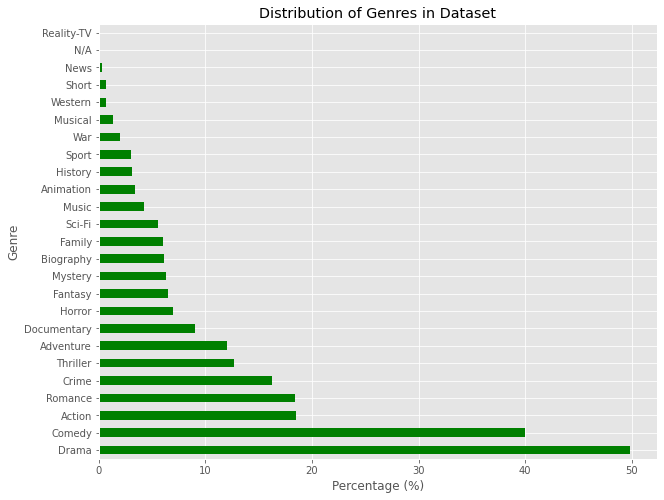

In [9]:
fig, ax = plt.subplots(figsize=(10, 8))
df_genre_percent.plot(kind='barh', color='green', legend=False, ax=ax)
ax.set_xlabel("Percentage (%)")
ax.set_ylabel("Genre")
ax.set_title("Distribution of Genres in Dataset")
# plt.savefig("percentage-of-genres.png")

So our data is heavily favorite toward Dramas and Comedies

## Clean it up

In [10]:
movies_metadata = pd.read_csv("data/movies-metadata.csv", thousands=",").drop(columns=['Unnamed: 0', '_id'])
movies_metadata[movies_metadata['imdbID'] == 'tt2070791'] # bad data sample because of a missing

Language  Box_office Country  Rated     imdbID  \
4234  English         NaN     USA  TV-14  tt2070791   

                                                 Awards  \
4234  Won 1 Primetime Emmy. Another 3 wins & 11 nomi...   

                                                 Poster Director Released  \
4234  http://ia.media-imdb.com/images/M/MV5BMjI5ODk1...      NaN      NaN   

           Writer  imdbVotes Runtime  Response  imdbRating       Title  \
4234  Eric Kripke    70570.0  43 min      True         6.7  Revolution   

                         Genre  \
4234  Action, Adventure, Drama   

                                                 Actors    Type  Metascore  
4234  Billy Burke, Tracy Spiridakos, Giancarlo Espos...  series        NaN

In [11]:
def create_year(series_object):
    # print(series_object)
    if isinstance(series_object['Released'], str):
        year = int(series_object['Released'].split()[-1])
    else:
        year = 0
    return year

In [12]:
movies_metadata['release_year'] = movies_metadata.apply(create_year, axis=1)

In [13]:
movie_years = movies_metadata.drop(movies_metadata[movies_metadata['release_year'] == 0].index)
min_year = movie_years['release_year'].min()
max_year = movie_years['release_year'].max()
print(min_year, max_year)

1980 2016


In [14]:
count_by_year = np.zeros(max_year-min_year+1, dtype='int32')
# print("YEAR| COUNT MOVIES")
for year in range(min_year, max_year+1):
    count_by_year[year-2010] = movie_years.loc[movie_years['release_year'] == year, 'release_year'].count()
    # print(f"{year}:", count_by_year[year-2010])


Text(0.5, 1.0, 'Number of films from each year')

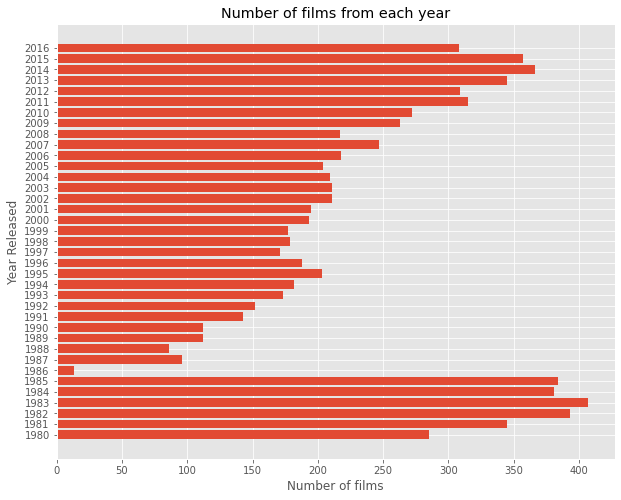

In [15]:
import matplotlib.pyplot as plt
years = np.arange(min_year, max_year+1)
labels = np.arange(len(years))
plt.figure(figsize=(10, 8))
plt.barh(labels, count_by_year, align='center')
plt.yticks(labels, years)
plt.ylabel("Year Released")
plt.xlabel("Number of films")
plt.title("Number of films from each year")
# plt.savefig("distribution-by-year.png")

In [16]:
genres = pd.read_csv("data/posters-and-genres.csv").rename(columns={'Id': 'imdbID'})
movies_metadata = movies_metadata.merge(genres, on='imdbID')

In [17]:
duplicates = movies_metadata['imdbID'].duplicated(keep=False)
duplicates.sum()

48

In [18]:
movies_metadata = movies_metadata.drop_duplicates()
movies_metadata.shape

(7242, 46)

In [19]:
missing_years = movies_metadata.loc[movies_metadata['release_year'] == 0][['Language', 'Box_office', 'Country', 'Rated', 'imdbID', 'Awards',
       'Poster', 'Director', 'Released', 'Writer', 'imdbVotes', 'Runtime', 'Type',
       'Response', 'imdbRating', 'Title', 'Genre_x']]

In [20]:
from PIL import Image

def plot_posters(movie_list):
    img_dir = "data/Images/"
    fig = plt.figure(figsize=(16, 12))
    # plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0, hspace=None)
    columns = 8
    rows = len(movie_list) // columns + 1
    # fig, ax = plt.subplots(rows, columns, figsize=(40, 12))
    for i in range(len(movie_list)):
        img = Image.open(os.path.join(img_dir, movie_list[i][0] + ".jpg")).resize((300, 450))
        # print(i, i // columns, i%columns, rows)
        ax = fig.add_subplot(rows, columns, i+1)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(movie_list[i][1], fontsize=8)
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

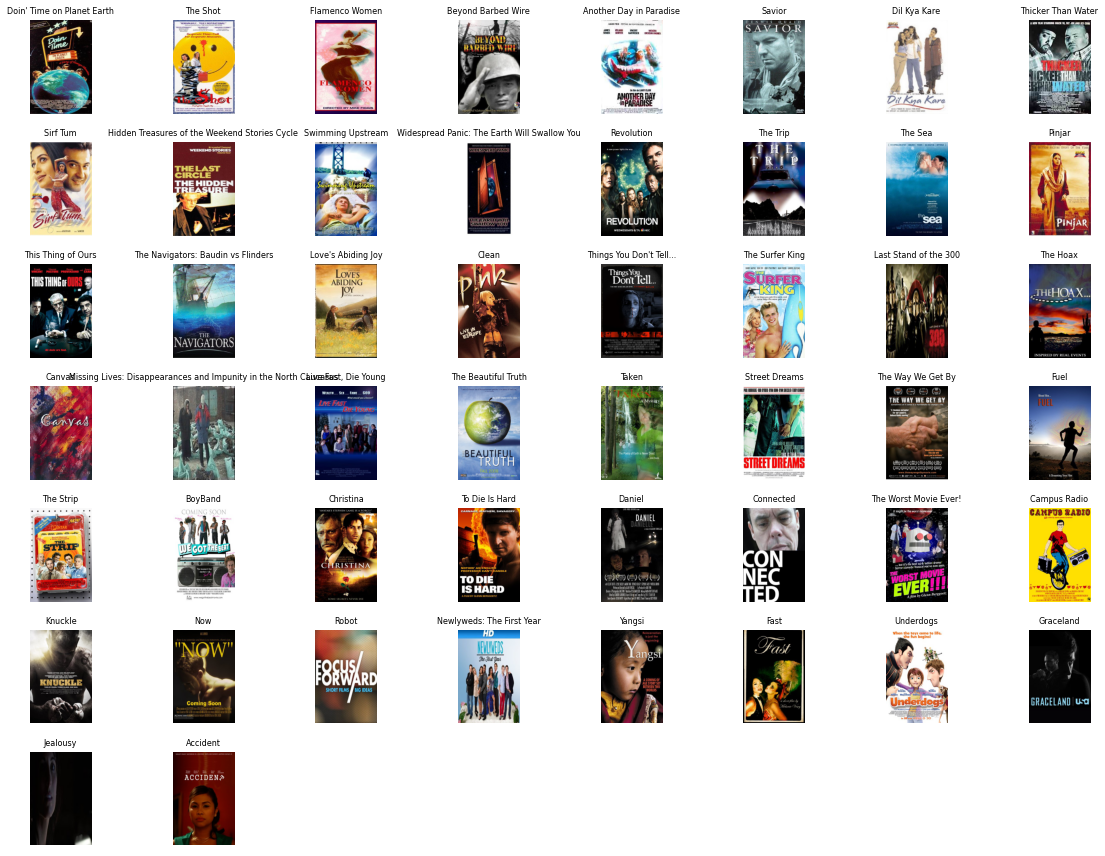

In [21]:
movie_list = missing_years[['imdbID', 'Title']].values
plot_posters(movie_list)

In [22]:
missing_years[['imdbID', 'Director', 'Title', 'Type']]

imdbID                                         Director  \
954   tt0095047                                  Charles Matthau   
2451  tt0117638                                         Dan Bell   
2622  tt0200640                                      Mike Figgis   
2658  tt0118709                                      Steve Rosen   
2827  tt0127722                                      Larry Clark   
2857  tt0120070                              Predrag Antonijevic   
3052  tt0216707                                      Prakash Jha   
3064  tt0220095                             Richard Cummings Jr.   
3071  tt0244794                                         Ahathian   
3320  tt0289456                                Krzysztof Zanussi   
3750  tt0259017                                  Robert J. Emery   
3767  tt1736672                               Christopher Hanson   
3785  tt2070791                                              NaN   
3985  tt0293961                                       Mark Cross   
4009  tt0351708                                    Eduardo Arnal   
4013  tt0347779                          Chandra Prakash Dwivedi   
4022  tt0338497                                 Danny Provenzano   
4041  tt0402398                                       Klaus Toft   
4567  tt0785025                               Michael Landon Jr.   
4587  tt0844289                                Alexandre Michaud   
4618  tt0487894                                       Alex Melli   
4664  tt0418206                               Bernard Murray Jr.   
4679  tt0892737                                   David Padrusch   
4810  tt1266072                                        Huw Bowen   
4940  tt1072430                                    Allan B. Holt   
4971  tt1697641                                              NaN   
5280  tt1253853                                  Timothy A. Chey   
5285  tt1288553                                   Steve Kroschel   
5330  tt1391871                         Jason Brown, John Hadden   
5521  tt0838241                                Chris Zamoscianyk   
5527  tt1326900                                      Aron Gaudet   
5553  tt1072437                                   Oktay Ortabasi   
5591  tt0843876                                      Jameel Khan   
5848  tt1266615                                       Jon Artigo   
5855  tt1297921                                      Larry Brand   
5867  tt1562904                                  Glenn Berggoetz   
5871  tt1612279                                    Alain Furcajg   
6117  tt1813237  Tushar Apte, Marcello Fabiano, Ashlee Marcuccio   
6137  tt1801113                                  Glenn Berggoetz   
6173  tt1409006                                      Aaron James   
6180  tt1606259                                       Ian Palmer   
6183  tt2090580                                     Lydia Galeno   
6315  tt2905084                                       Liz Garbus   
6517  tt2010510                                              NaN   
6519  tt2260060                                     Mark Elliott   
6546  tt3313776                                    Melanie Vesey   
6819  tt1634003                             Juan José Campanella   
6828  tt2393813                                              NaN   
7167  tt3460726                                  Adele Slaughter   
7217  tt3906606                                         Ava Tong   

                                                  Title    Type  
954                          Doin' Time on Planet Earth   movie  
2451                                           The Shot   movie  
2622                                     Flamenco Women   movie  
2658                                 Beyond Barbed Wire   movie  
2827                            Another Day in Paradise   movie  
2857                                             Savior   movie  
3052                                       Dil Kya Kare   movie  
3064        

We need to do a few things: eliminate "series", fix unmatching movie posters if they exist, and deal with missing values

### Eliminate Series

In [23]:
movies_metadata.loc[movies_metadata['Type'] == 'series']

Language  Box_office  \
1232                                            English         NaN   
1619                                  Japanese, English         NaN   
1840                                            English         NaN   
3785                                            English         NaN   
3908          English, Hebrew, Aramaic, Yiddish, French         NaN   
4652                                            English         NaN   
5523                                            English         NaN   
5801  English, Arabic, German, Spanish, French, Hung...    145118.0   
6096                        Portuguese, French, English         NaN   
6412                                            English         NaN   
6517                                            English         NaN   
6828                                            English         NaN   
6892                                            English         NaN   
7092                                            English         NaN   

               Country      Rated     imdbID  \
1232                UK       TV-G  tt0096657   
1619             Japan  NOT RATED  tt0113726   
1840               USA        NaN  tt0106176   
3785               USA      TV-14  tt2070791   
3908        USA, Italy      TV-MA  tt0318997   
4652               USA        NaN  tt0830361   
5523                UK        NaN  tt1531706   
5801   France, Germany  NOT RATED  tt1321865   
6096  Portugal, France        NaN  tt1242503   
6412               USA        NaN  tt2170584   
6517               USA        NaN  tt2010510   
6828               USA        NaN  tt2393813   
6892               USA        NaN  tt2884170   
7092               USA        NaN  tt3400342   

                                                 Awards  \
1232                            3 wins & 7 nominations.   
1619                                                NaN   
1840                                                NaN   
3785  Won 1 Primetime Emmy. Another 3 wins & 11 nomi...   
3908  Won 5 Golden Globes. Another 50 wins & 40 nomi...   
4652  Nominated for 2 Primetime Emmys. Another 10 no...   
5523                                                NaN   
5801  Won 1 Golden Globe. Another 15 wins & 34 nomin...   
6096                                                NaN   
6412                            4 wins & 8 nominations.   
6517                                                NaN   
6828                             1 win & 2 nominations.   
6892                                                NaN   
7092                                                NaN   

                                                 Poster Director     Released  \
1232  http://ia.media-imdb.com/images/M/MV5BMTUxOTY2...      NaN  02 Apr 1992   
1619  http://ia.media-imdb.com/images/M/MV5BMTQ2NjYy...      NaN  04 Jun 1993   
1840  http://ia.media-imdb.com/images/M/MV5BMjAwMzE0...      NaN  22 Mar 1993   
3785  http://ia.media-imdb.com/images/M/MV5BMjI5ODk1...      NaN          NaN   
3908  http://ia.media-imdb.com/images/M/MV5BMTI4NDY4...      NaN  07 Dec 2003   
4652  http://ia.media-imdb.com/images/M/MV5BMzIyMzQ2...      NaN  11 Dec 2006   
5523  http://ia.media-imdb.com/images/M/MV5BMjI4Mjg5...      NaN  09 Sep 2009   
5801  http://ia.media-imdb.com/images/M/MV5BMTkwNDU4...      NaN  08 Jan 2011   
6096  http://ia.media-imdb.com/images/M/MV5BNGQwODJh...      NaN  01 May 2011   
6412  http://ia.media-imdb.com/images/M/MV5BOTgxOTMw...      NaN  11 May 2012   
6517  http://ia.media-imdb.com/images/M/MV5BMjAxMjI0...      NaN          NaN   
6828  http://ia.media-imdb.com/images/M/MV5BMTQzNjM5...      NaN          NaN   
6892  http://ia.media-imdb.com/images/M/MV5BMjI3NzA4...      NaN  24 Sep 2013   
7092  http://ia.media-imdb.com/images/M/MV5BOWJlMzE5...      NaN  01 Jan 2014   

                               Writer  ...  N/A News  Reality-TV  Romance  \
1232                              NaN  ...    0    0           0        0   
1619

So we have 14 series in this dataset. Series are not movies, so they will be eliminated.

In [24]:
print(movies_metadata.shape)
movies_metadata_cleaned = movies_metadata.drop(movies_metadata.loc[movies_metadata['Type'] == 'series'].index)
print(movies_metadata_cleaned.shape)

(7242, 46)
(7228, 46)


Looks good. We dropped 14 values.

### Eliminate Bad Posters

Now after some additional evaluation, the poster that appeared in previous analysis was removed because it was a series. Therfore, we can make the assumption that the movie posters are likely to be the accurate poster, considering the data processing step outlined by the team that created this dataset (scraping IMDb data). If the posters are wrong, then they are wrong on IMDb, which we cannot do much to change confidently.

### Missing Values

In [25]:
movies_metadata_cleaned.isnull().sum()

Language          15
Box_office      1785
Country            2
Rated            780
imdbID             0
Awards          1911
Poster             0
Director           6
Released          47
Writer           314
imdbVotes         23
Runtime           57
Response           0
imdbRating        22
Title              0
Genre_x            9
Actors            48
Type               0
Metascore       2961
release_year       0
Genre_y            0
Action             0
Adventure          0
Animation          0
Biography          0
Comedy             0
Crime              0
Documentary        0
Drama              0
Family             0
Fantasy            0
History            0
Horror             0
Music              0
Musical            0
Mystery            0
N/A                0
News               0
Reality-TV         0
Romance            0
Sci-Fi             0
Short              0
Sport              0
Thriller           0
War                0
Western            0
dtype: int64

So there are a few issues here: missing categorical values do not make much sense to replace with another category, except potentially rated, language, and country. But at the same time, rating could mean the movie is in fact, unrated. Other "non-categorical" categorical variables are director, writer, actors, awards, etc., meaning these values are not derived from any fixed set. That means we can kind of ignore them.

However, since we are missing 1785 values for box_office, which will be out `y`, there could be difficulty there with estimating the value. Mode is a value that doesn't really make sense, but mean and median are not off the table. However, because there is so much data, we shoudl look at those values that are missing.

In [26]:
movies_metadata_cleaned.loc[movies_metadata_cleaned['Box_office'].isnull()]

Language  Box_office      Country      Rated  \
18                              English         NaN  Canada, USA          R   
19                              English         NaN          USA          R   
20                   English, Inuktitut         NaN          USA         PG   
22                              English         NaN          USA          R   
25                              English         NaN          USA          R   
...                                 ...         ...          ...        ...   
7268                            English         NaN          USA  NOT RATED   
7269                            English         NaN       Canada        NaN   
7273           English, Spanish, French         NaN   Spain, USA        NaN   
7274                            English         NaN           UK        NaN   
7277  Catalan, English, Basque, Spanish         NaN          NaN         PG   

         imdbID                                             Awards  \
18    tt0086129                                      1 nomination.   
19    tt0086508                                                NaN   
20    tt0086005  Nominated for 1 Oscar. Another 4 wins & 2 nomi...   
22    tt0085470                                                NaN   
25    tt0086352                                                NaN   
...         ...                                                ...   
7268  tt2505856                                             1 win.   
7269  tt3957716                                                NaN   
7273  tt2409818                            2 wins & 5 nominations.   
7274  tt2062622                                      1 nomination.   
7277  tt4179482                                     4 nominations.   

                                                 Poster  \
18    http://ia.media-imdb.com/images/M/MV5BMTI4MDgy...   
19    http://ia.media-imdb.com/images/M/MV5BMTQ4MTYx...   
20    http://ia.media-imdb.com/images/M/MV5BMTkxMTA5...   
22    http://ia.media-imdb.com/images/M/MV5BMjA5MDE0...   
25    http://ia.media-imdb.com/images/M/MV5BMTI3NzI2...   
...                                                 ...   
7268  http://ia.media-imdb.com/images/M/MV5BMjExODQ2...   
7269  http://ia.media-imdb.com/images/M/MV5BMTY3MTg0...   
7273  http://ia.media-imdb.com/images/M/MV5BNTA1OTU4...   
7274  http://ia.media-imdb.com/images/M/MV5BMTk0OTU3...   
7277  http://ia.media-imdb.com/images/M/MV5BMTkzOTQ4...   

                         Director     Released  \
18                      Bob Clark  24 Jun 1983   
19                   Ted Kotcheff  16 Dec 1983   
20                Carroll Ballard  27 Jan 1984   
22               James Signorelli  19 Aug 1983   
25             Sean S. Cunningham  25 Mar 1983   
...                           ...          ...   
7268            Jack Thomas Smith  16 Mar 2014   
7269                  Robin Sharp  11 Sep 2014   
7273              Nacho Vigalondo  02 Oct 2014   
7274                    Mike Disa  23 May 2014   
7277  Beñat Beitia, Ricardo Ramón  07 Nov 2014   

                                                 Writer  ...  N/A News  \
18               Roger Swaybill, Alan Ormsby, Bob Clark  ...    0    0   
19                                           Joe Gayton  ...    0    0   
20    Farley Mowat (based on the book by), Curtis Ha...  ...    0    0   
22    Rodney Dangerfield, Michael Endler, P.J. O'Rou...  ...    0    0   
25                                         David Smilow  ...    0    0   
...                                                 ...  ...  ...  ...   
7268                                  Jack Thomas Smith  ...    0    0   
7269                   Robin Sharp (story), Robin Sharp  ...    0    0   
7273                                    Nacho Vigalondo  ...    0    0   
7274  Annika Bluhm (screenplay), Nicole Dubuc, Kim F...  ...    0    0   
7277          Daniel Torres (screenplay), Daniel Torres  ...    0    0   

      Reality-TV  Romance Sci-Fi Short Spo

First, let's start with the easier task of dealing with numerical data missing values.

For now, I will jsut drop movies without a budget.

In [27]:
movies_metadata_cleaned.dropna(subset=['Box_office'], inplace=True)

## Categeroize Budgets

In [28]:
print(movies_metadata_cleaned['Box_office'].mean())
print(movies_metadata_cleaned['Box_office'].median())

24880168.703288626
4439434.0


This difference implies there is substantial differences between the greatest values and the rest of the data. Let's plot the box_office

Text(0, 0.5, 'Box Office (in 100 Million Dollars)')

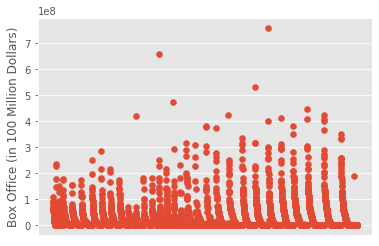

In [29]:
plt.figure()
plt.scatter(np.arange(len(movies_metadata_cleaned['Box_office'].values)), movies_metadata_cleaned['Box_office'].values)
plt.xticks([])
plt.ylabel("Box Office (in 100 Million Dollars)")

This graph doesn't really tell us much, so lets plot a probability density.

760504827.0


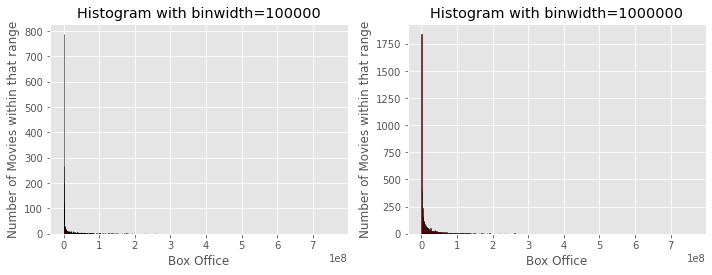

In [30]:
box_office_values = np.sort(movies_metadata_cleaned['Box_office'].values)
range_data = (box_office_values[-1] - box_office_values[0])
print(range_data)
ax = plt.figure(figsize=(10, 7))
for i, binwidth in enumerate([100000, 1000000]): # this will take some time to run...
    ax = plt.subplot(2, 2, i + 1)
    ax.hist(box_office_values, color='red', edgecolor='black', bins=int(range_data/binwidth))
    ax.set_title(f"Histogram with binwidth={binwidth}")
    ax.set_xlabel("Box Office")
    ax.set_ylabel("Number of Movies within that range")
plt.tight_layout()
plt.show()

Yeah so there is quite a bit of data in the low range of box_office... Let's see what the some percentiles are...

In [31]:
for percentile in np.arange(10, 100, 10):
    print(percentile, f"| {np.percentile(box_office_values, percentile):.2f}")
# print(twentieth_percentile)

10 | 46843.20
20 | 214749.40
30 | 652457.60
40 | 1750232.00
50 | 4439434.00
60 | 9592705.80
70 | 17869631.60
80 | 34957763.80
90 | 70260176.00


So, as expected, the mean of 24880168.703288626 does NOT reflect the data very well, considering it only really represents the top 20-30% of the data. 

The scales from the paper were as follows:

    class 1: profit less than or equal to 0.5 million

    class 2: profit between 0.5M and 1M

    class 3: profit between 1M and 40M

    class 4: profit between 40M and 150M
    
    class 5: profit greater than 150M

Now we currently do not have budget information, so we cannot calculate profit right now. But we can categorize based on box office.

So we first need to know how many to put into each group. If we want equally distributed data, we can just put 20% into each category, and let the thresholds define themselves, or we could preedefine the ranges. For now, we will evenly distribute the data.

In [32]:
class_thresholds = np.zeros(5, dtype='int32')
for split_point in np.arange(20, 100, 20):
    class_thresholds[split_point//20-1] = round(np.percentile(box_office_values, split_point))
    print(f"Class {split_point//20}: values <", f"{class_thresholds[split_point//20-1]}")

Class 1: values < 214749
Class 2: values < 1750232
Class 3: values < 9592706
Class 4: values < 34957764


So our classes will be set up as follows:
    
    class 1: box office less than $214,749

    class 2: box office between $214,749 and $1,750,232

    class 3: box office between $1,750,232 and $9,592,706
    
    class 4: box office between $9,592,706 and $34,957,764
    
    class 5: box office greater than or equal to $34,957,764
    

In [33]:
def create_category(series_object, class_thresholds):
    '''
    reflects the categories similar to those specified by paper
    '''
    box_office = series_object['Box_office']
    if box_office < class_thresholds[0]:
        return 1
    elif box_office < class_thresholds[1]:
        return 2
    elif box_office < class_thresholds[2]:
        return 3
    elif box_office < class_thresholds[3]:
        return 4
    else:
        return 5

Now let's create this new row in the metadata so we can better predict data.

In [34]:
movies_metadata_cleaned['box_office_class'] = movies_metadata_cleaned.apply(lambda x: create_category(x, class_thresholds), axis=1)
movies_metadata_cleaned.head()

Language   Box_office  Country Rated     imdbID  \
0                            English  108423489.0      USA     R  tt0086425   
1                            English   94900000.0      USA     R  tt0085549   
2                            English   90400000.0      USA     R  tt0086465   
3                            English   79568000.0      USA    PG  tt0086567   
4  English, Russian, German, Spanish   67900000.0  UK, USA    PG  tt0086034   

                                              Awards  \
0    Won 5 Oscars. Another 26 wins & 17 nominations.   
1     Won 1 Oscar. Another 10 wins & 14 nominations.   
2  Nominated for 1 Oscar. Another 3 wins & 4 nomi...   
3  Nominated for 3 Oscars. Another 4 wins & 11 no...   
4                            2 wins & 3 nominations.   

                                              Poster         Director  \
0  http://ia.media-imdb.com/images/M/MV5BMTk0ODM4...  James L. Brooks   
1  http://ia.media-imdb.com/images/M/MV5BMjA5NjE2...      Adrian Lyne   
2  http://ia.media-imdb.com/images/M/MV5BMTc0ODg5...      John Landis   
3  http://ia.media-imdb.com/images/M/MV5BMTMyMTE3...      John Badham   
4  http://ia.media-imdb.com/images/M/MV5BMjI2MDE0...        John Glen   

      Released                                             Writer  ...  News  \
0  09 Dec 1983  Larry McMurtry (based on the novel by), James ...  ...     0   
1  15 Apr 1983  Thomas Hedley Jr. (screenplay), Joe Eszterhas ...  ...     0   
2  08 Jun 1983                  Timothy Harris, Herschel Weingrod  ...     0   
3  03 Jun 1983                  Lawrence Lasker, Walter F. Parkes  ...     0   
4  10 Jun 1983  George MacDonald Fraser (screen story and scre...  ...     0   

  Reality-TV  Romance  Sci-Fi Short Sport Thriller War  Western  \
0          0        0       0     0     0        0   0        0   
1          0        1       0     0     0        0   0        0   
2          0        0       0     0     0        0   0        0   
3          0        0       1     0     0        1   0        0   
4          0        0       0     0     0        1   0        0   

   box_office_class  
0                 5  
1                 5  
2                 5  
3                 5  
4                 5  

[5 rows x 47 columns]

## Curious about how movies panned based on their release month? I am.

Let's see what movies are missing a release date.

In [35]:
movies_metadata_cleaned.loc[movies_metadata_cleaned['Released'].isnull()]

Language  Box_office      Country    Rated  \
2827                          English   1025234.0          USA        R   
2857  English, Serbo-Croatian, French     12903.0          USA        R   
3064                          English     79823.0          USA        R   
4567                              NaN    252726.0          USA       PG   
5280                          English     15622.0          USA      NaN   
5521                          English     84944.0          USA        R   
5527                          English    106042.0          USA  UNRATED   
5591                          English      5107.0          USA    PG-13   
5867                          English      4189.0          USA      NaN   
6137                          English     25206.0          USA      NaN   
6180                          English      2647.0  UK, Ireland        R   

         imdbID                  Awards  \
2827  tt0127722  3 wins & 1 nomination.   
2857  tt0120070                 2 wins.   
3064  tt0220095                     NaN   
4567  tt0785025                     NaN   
5280  tt1253853                     NaN   
5521  tt0838241                  1 win.   
5527  tt1326900  1 win & 2 nominations.   
5591  tt0843876                     NaN   
5867  tt1562904                     NaN   
6137  tt1801113                     NaN   
6180  tt1606259          2 nominations.   

                                                 Poster              Director  \
2827  http://ia.media-imdb.com/images/M/MV5BMTYwMjA1...           Larry Clark   
2857  http://ia.media-imdb.com/images/M/MV5BMTkwNTE1...   Predrag Antonijevic   
3064  http://ia.media-imdb.com/images/M/MV5BMTA2OTc3...  Richard Cummings Jr.   
4567  http://ia.media-imdb.com/images/M/MV5BMTc1MTM2...    Michael Landon Jr.   
5280  http://ia.media-imdb.com/images/M/MV5BODIwNTI0...       Timothy A. Chey   
5521  http://ia.media-imdb.com/images/M/MV5BMTcwNzAy...     Chris Zamoscianyk   
5527  http://ia.media-imdb.com/images/M/MV5BMjA2Njc1...           Aron Gaudet   
5591  http://ia.media-imdb.com/images/M/MV5BODI4MzQz...           Jameel Khan   
5867  http://ia.media-imdb.com/images/M/MV5BMjI2MTE4...       Glenn Berggoetz   
6137  http://ia.media-imdb.com/images/M/MV5BMTQ2NDI5...       Glenn Berggoetz   
6180  http://ia.media-imdb.com/images/M/MV5BMjAwNTYz...            Ian Palmer   

     Released                                             Writer  ...  News  \
2827      NaN  Eddie Little (book), Christopher Landon, Steph...  ...     0   
2857      NaN                                         Robert Orr  ...     0   
3064      NaN           Ernest Nyle Brown, Julie Shannon (story)  ...     0   
4567      NaN  Michael Landon Jr. (teleplay), Douglas Lloyd M...  ...     0   
5280      NaN                                    Timothy A. Chey  ...     0   
5521      NaN              Elisa Delson, Rob Dyrdek, Nino Scalia  ...     0   
5527      NaN                       Aron Gaudet, Gita Pullapilly  ...     0   
5591      NaN                                        Jameel Khan  ...     0   
5867      NaN                                    Glenn Berggoetz  ...     0   
6137      NaN                                    Glenn Berggoetz  ...     0   
6180      NaN                                                NaN  ...     0   

     Reality-TV  Romance  Sci-Fi Short Sport Thriller War  Western  \
2827          0        0       0     0     0        1   0        0   
2857          0        0       0     0     0        0   1        0   
3064          0        0       0     0     0        0   0        0   
4567          0        0       0     0     0        0   0        1   
5280          0        0       0     0     0        0   0        0   
5521          0        0       0     0     0        0   0        0   
5527          0        0       0     0     0        0   0        0   
5591          0        0       0     0     0        0   0        0   
5867          0        0       0     0     0        0   0  

We will get back to that, but let's make a column for release month first, then assign to those missing values the maximum across the missing values.

In [36]:
month_map = {
    'Jan': 0,
    'Feb': 1,
    'Mar': 2,
    'Apr': 3,
    'May': 4,
    'Jun': 5,
    'Jul': 6,
    'Aug': 7,
    'Sep': 8,
    'Oct': 9,
    'Nov': 10,
    'Dec': 11,
}
def create_month(series_object, month_map=month_map):
    if isinstance(series_object['Released'], str):
        month = month_map[series_object['Released'].split()[1]]
    else:
        month = np.NaN
    return month

In [37]:
movies_metadata_cleaned['release_month'] = movies_metadata_cleaned.apply(create_month, axis=1)

In [38]:
print(movies_metadata_cleaned.loc[movies_metadata_cleaned['release_month'].isnull()].shape)

(11, 48)


Now we can fill these values with the mode in the released_month column, which is:

In [39]:
movies_metadata_cleaned['release_month'].mode()[0]

9.0

In [40]:
movies_metadata_cleaned['release_month'].fillna(movies_metadata_cleaned['release_month'].mode()[0], inplace=True)
print(movies_metadata_cleaned.loc[movies_metadata_cleaned['release_month'].isnull()].shape)

(0, 48)


A shape of 0 rows means we did it! Now lets see the distributtion for each class per month

In [41]:
movies_metadata_cleaned = movies_metadata_cleaned.astype({'release_month': 'int32'}).sort_values(['release_month'])

In [42]:
months = movies_metadata_cleaned['release_month'].value_counts().sort_index().index.tolist()
months

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [43]:
class1_month_counts = movies_metadata_cleaned.loc[movies_metadata_cleaned['box_office_class'] == 1]['release_month'].value_counts().sort_index().values
class2_month_counts = movies_metadata_cleaned.loc[movies_metadata_cleaned['box_office_class'] == 2]['release_month'].value_counts().sort_index().values
class3_month_counts = movies_metadata_cleaned.loc[movies_metadata_cleaned['box_office_class'] == 3]['release_month'].value_counts().sort_index().values
class4_month_counts = movies_metadata_cleaned.loc[movies_metadata_cleaned['box_office_class'] == 4]['release_month'].value_counts().sort_index().values
class5_month_counts = movies_metadata_cleaned.loc[movies_metadata_cleaned['box_office_class'] == 5]['release_month'].value_counts().sort_index().values

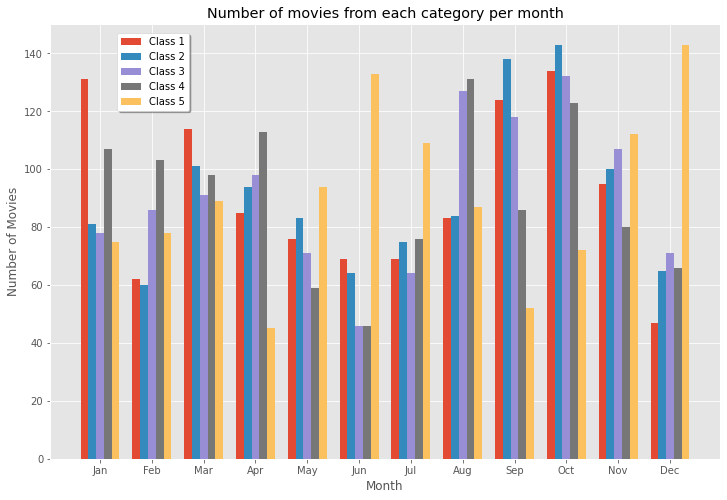

In [44]:
months = np.array(months)
month_names = month_map.keys() # the label locations
width = 0.15  # the width of the bars
# print(month_names)
plt.figure(figsize=(12, 8))
rects1 = plt.bar(months - 2*width, class1_month_counts, width, label='Class 1', align='center')
rects1 = plt.bar(months - width, class2_month_counts, width, label='Class 2', align='center')
rects1 = plt.bar(months, class3_month_counts, width, label='Class 3', align='center')
rects1 = plt.bar(months + width, class4_month_counts, width, label='Class 4', align='center')
rects1 = plt.bar(months + 2*width, class5_month_counts, width, label='Class 5', align='center')

# Add some text for labels, title and custom x-axis tick labels, etc.
# ax.set_ylabel('Number of Movies')
# ax.set_title('Number of movies from each category per month')
# ax.set_xlabel("Month")
# ax.set_xticks(x)
# ax.set_xticklabels(months)
# ax.legend()
plt.ylabel('Number of Movies')
plt.title('Number of movies from each category per month')
plt.xlabel("Month")
plt.xticks(months, labels=month_names)
# plt.xticklabels(months)
# plt.facecolor('white')
plt.legend(loc=(0.1, 0.8), shadow=True, facecolor='white')
plt.savefig("figures/month-distribution-by-category.png")